/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 0 images belonging to 0 classes.
Found 6585 images belonging to 2 classes.


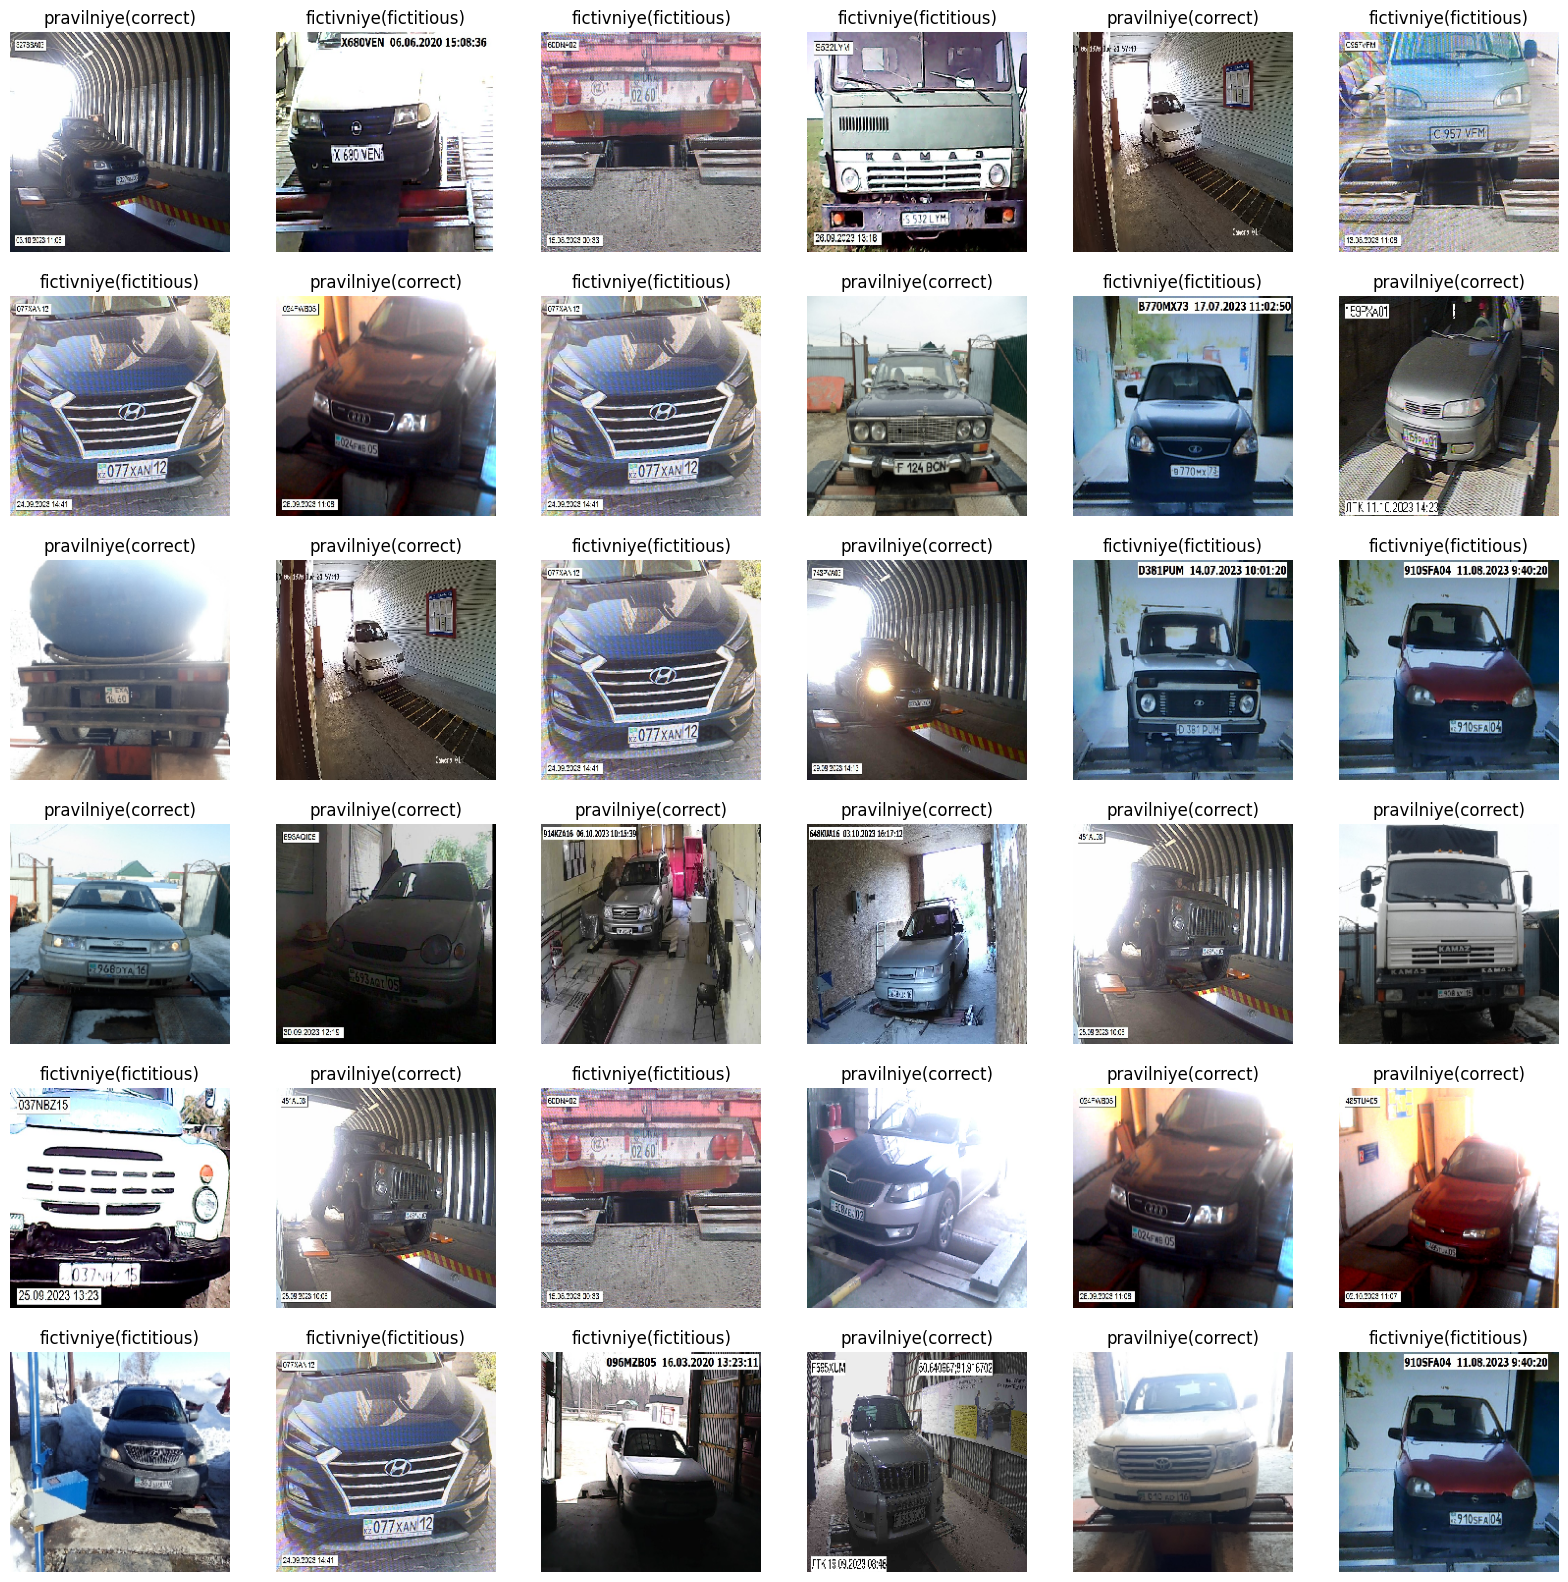

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import glob as gb
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import os



train_path = '/kaggle/input/datasaur/techosmotr/techosmotr/train'
test_path = '/kaggle/input/datasaur/techosmotr/techosmotr/test'


train_datagen = ImageDataGenerator(
    rescale=1.0/255,                # Rescale pixel values to [0, 1]
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

size_images = 224
batch_size = 64

# Create a generator for testing data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(size_images, size_images),
    batch_size = batch_size,
    class_mode='categorical')


train_generator = train_datagen.flow_from_directory(
    train_path,                     # Path to the training data
    target_size=(size_images, size_images),  # Resize images to this size
    batch_size=batch_size,           # Number of images in each batch
    seed=32,                         # Optional: Set a random seed for shuffling
    shuffle=True,                    # Shuffle the data during training
    class_mode='categorical'        # Mode for class labels (categorical for one-hot encoding)
)



# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate the count of images per class
class_counts = {label: 0 for label in class_labels}

for i in range(len(test_generator)):
    batch_data, batch_labels = test_generator[i]
    for j in range(len(batch_data)):
        class_idx = int(batch_labels[j].argmax())
        class_label = class_labels[class_idx]
        class_counts[class_label] += 1

def Show_Images(target_gen):
    # Get a batch of images and labels
    batch_images, batch_labels = next(target_gen)

    # Get class labels
    class_labels = list(target_gen.class_indices.keys())

    # Display images with labels
    plt.figure(figsize=(20, 20))
    for n , i in enumerate(list(np.random.randint(0,len(batch_images),36))):
        plt.subplot(6, 6, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])  # Display the class label
        plt.axis('off')
    plt.show()

    
Show_Images(train_generator)
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


25/25 [==============================] - 3s 94ms/step
    file_index  class
0     78942502      1
1     72473767      0
2     72306150      1
3     79367589      0
4     76954750      0
..         ...    ...
772   79797333      0
773   76019137      1
774   78672316      0
775   70007467      1
776   73885075      0

[777 rows x 2 columns]


In [18]:

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

num_classes = 2

from sklearn.metrics import f1_score


# Load a pre-trained ResNet model
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False)

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])




# Train the model
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=5)


# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=5,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // batch_size,
#     callbacks=[callback]
# )

# Optionally, fine-tune the top layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=5)



Epoch 1/7
103/103 [==============================] - 59s 541ms/step - loss: 0.4904 - accuracy: 0.7957
Epoch 2/7
103/103 [==============================] - 52s 503ms/step - loss: 0.3231 - accuracy: 0.8655
Epoch 3/7
103/103 [==============================] - 51s 497ms/step - loss: 0.3052 - accuracy: 0.8724
Epoch 4/7
103/103 [==============================] - 52s 501ms/step - loss: 0.2788 - accuracy: 0.8819
Epoch 5/7
103/103 [==============================] - 52s 502ms/step - loss: 0.2724 - accuracy: 0.8838
Epoch 6/7
103/103 [==============================] - 51s 497ms/step - loss: 0.2675 - accuracy: 0.8902
Epoch 7/7
103/103 [==============================] - 52s 504ms/step - loss: 0.2574 - accuracy: 0.8934
Epoch 1/5
103/103 [==============================] - 60s 506ms/step - loss: 0.4708 - accuracy: 0.8832
Epoch 2/5
103/103 [==============================] - 52s 508ms/step - loss: 0.1865 - accuracy: 0.9226
Epoch 3/5
103/103 [==============================] - 52s 505ms/step - loss: 0.1574

In [ ]:
test_folder = '/kaggle/input/datasaur/techosmotr/techosmotr/test'  # Replace with the actual path to your test image folder
size_images = 224  # Adjust the size according to your model's input size

        
        
        
images = []
image_names = []

for image_file in os.listdir(test_folder):
    if image_file.endswith(('.jpg', '.jpeg', '.png')):  # Filter by supported image file extensions
        image_path = os.path.join(test_folder, image_file)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (size_images, size_images))
        img = img / 255.0  # Rescale pixel values to [0, 1]
        
        image_name_without_extension = os.path.splitext(image_file)[0]
        image_names.append(image_name_without_extension) 
        images.append(img)
        
        
        
        

# Convert the list of images to a single numpy array
images_batch = np.array(images)

# Make predictions
predictions = model.predict(images_batch)

# Convert predictions to 0 or 1 based on a threshold (0.5 in this case)
threshold = 0.5
binary_predictions = [1 if pred[0] > threshold else 0 for pred in predictions]


# Create a DataFrame to store the results
results_df = pd.DataFrame({'file_index': image_names, 'class': binary_predictions})

# Save the results to a CSV file
results_df.to_csv('results.csv', index=False)
        
print(results_df)


In [10]:


# Select the last convolutional layer in ResNet50
last_conv_layer = model.get_layer('conv5_block3_out')

# Define the class index for which you want to generate Grad-CAM
class_index = 0  # Replace with the desired class index

# Load and preprocess the image
image_path = '/kaggle/input/datasaur/techosmotr/techosmotr/test/70252075.jpeg'  # Replace with your image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV loads images in BGR format, convert to RGB
img = cv2.resize(img, (224, 224))  # Resize to match ResNet50's input size
img = img / 255.0  # Rescale pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Get the class prediction for the input image
preds = model.predict(img)
predicted_class = np.argmax(preds)


def get_gradcam(model, input_image, class_index, layer_name):
    # Create a model that extracts the desired layer for visualization
    grad_model = tf.keras.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    # Get the feature maps and the prediction for the given class index
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(input_image)
        class_output = preds[:, class_index]

    # Calculate the gradients of the class score with respect to the feature maps
    grads = tape.gradient(class_output, last_conv_layer_output)

    # Pool the gradients over each feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each feature map by its importance (gradient)
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.nn.relu(heatmap)

    # Resize the heatmap to the original image size
    heatmap = tf.image.resize(heatmap, (input_image.shape[1], input_image.shape[2]))
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap /= tf.math.reduce_max(heatmap)

    return heatmap

heatmap = get_gradcam(model_efficient_net, input_image, label, layer_name='conv5_block3_out')

# Convert the heatmap to a NumPy array
heatmap = heatmap.numpy()

# Overlay the heatmap on the input image
alpha = 0.6  # Adjust the alpha value for the overlay effect
superimposed_img = cv2.addWeighted(input_image[0], alpha, heatmap, 1 - alpha, 0)

# Plot the input image, heatmap, and the overlaid image
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(input_image[0])
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(heatmap, cmap='viridis')
plt.title("Heatmap")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_img)
plt.title("Heatmap Overlay")
plt.axis('off')

plt.show()

1/1 [==============================] - 1s 641ms/step


AttributeError: 'KerasTensor' object has no attribute '_id'